In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import pandas as pd
from bayesian.train_bn import structure_learning, parameter_learning
from preprocess.discretization import get_nodes_type, discretization, inverse_discretization, code_categories
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from visualization.visualization import draw_BN
from bayesian.calculate_accuracy import calculate_acc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
geo = pd.read_csv('../datasets/hackathon_processed.csv')
geo.head(10)

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,1815.0,JURASSIC,LIMESTONE,75.0,55.2,21.0,410.0
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,3084.6,CRETACEOUS,SANDSTONE,223.5,43.2,10.0,8.0
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,2952.9,NEOGENE,THINLY-BEDDED SANDSTONE,34.5,19.8,22.0,200.0
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,3149.7,NEOGENE,SANDSTONE,152.7,123.0,20.0,300.0
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,ONSHORE,OIL,REJUVENATING,SALT,1486.5,CRETACEOUS,LIMESTONE,75.0,30.0,21.0,60.0
5,ALABAMA FERRY,UPPER GLEN ROSE D ZONE,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY,31.2143,-95.7981,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,2610.0,CRETACEOUS,LIMESTONE,28.5,4.5,12.0,20.0
6,ALBA,ALBA,UK,EUROPE,NORTH SEA CENTRAL,NaN,58.0692,1.0784,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,1692.6,PALEOGENE,THINLY-BEDDED SANDSTONE,90.0,81.0,NaN,3500.0
7,ALBION-SCIPIO,TRENTON-BLACK RIVER,USA,NORTH AMERICA,MICHIGAN,NaN,41.9937,-84.6016,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,1140.0,ORDOVICIAN,DOLOMITE,180.0,120.0,NaN,10.0
8,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION,48.4740,57.6667,KAZAKHOIL AKTOBE,ONSHORE,OIL,DEVELOPING,SUB-SALT,1800.0,CARBONIFEROUS,LIMESTONE,90.0,31.5,10.0,20.0
9,ALIBEKMOLA,KT II,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION,48.4740,57.6667,KAZAKHOIL AKTOBE,ONSHORE,OIL,DEVELOPING,SUB-SALT,2874.0,CARBONIFEROUS,LIMESTONE,182.1,32.4,10.0,20.0


In [4]:
columns = ['Tectonic regime', 'Period', 'Lithology', 'Hydrocarbon type', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
geo = geo[columns]
geo.dropna(inplace=True)
geo.reset_index(inplace=True, drop=True)

In [5]:
geo_discrete, label_coder = code_categories(geo, 'label', ['Tectonic regime', 'Period', 'Lithology', 'Hydrocarbon type', 'Structural setting'])

In [6]:
geo_nodes = get_nodes_type(geo)
geo_nodes

{'Tectonic regime': 'disc',
 'Period': 'disc',
 'Lithology': 'disc',
 'Hydrocarbon type': 'disc',
 'Structural setting': 'disc',
 'Gross': 'cont',
 'Netpay': 'cont',
 'Porosity': 'cont',
 'Permeability': 'cont',
 'Depth': 'cont'}

In [7]:
bn_geo = structure_learning(geo_discrete, 'HC', 'MI_mixed', geo_nodes)

  0%|          | 7/1000000 [00:14<588:18:14,  2.12s/it]


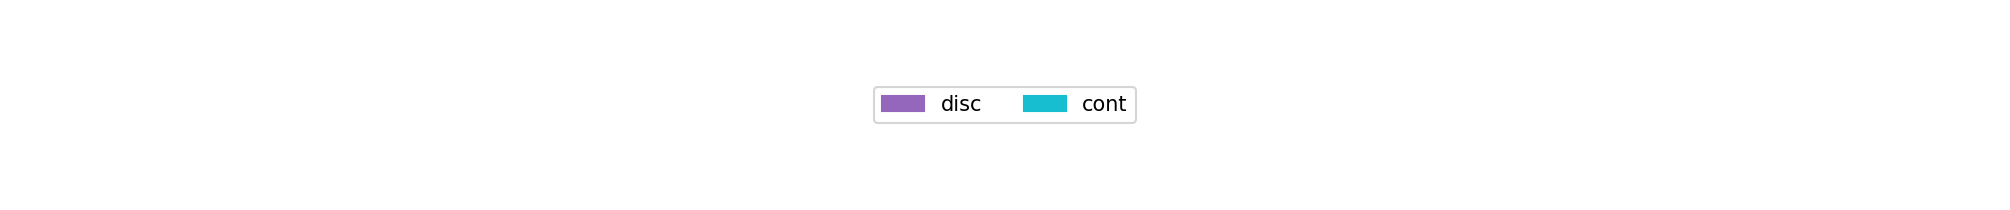

In [8]:
draw_BN(bn_geo, geo_nodes, 'mi_mixed')